## Using Linear Regression Algorithm for salary Prediction
Simple Linear Regression is finding the best relationship between the input variable x (independent variable) and the expected variable y (dependent variable). The linear relationship between these two variables can be represented by a straight line called regression line.

Formula :- $y = b0 + b1x$

What do terms represent?
- $y$ is the response or the target variable
- $x$ is the feature
- $b1$ is the coefficient of x
- $b0$ is the intercept

STEP 1: Load The Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [4]:
dataset.shape

(30, 2)

In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
#check any missing values

dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
#any outliers
dataset.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [8]:
dataset.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

Here, 'YearsExperience' is the independent variable and 'Salary' is the dependent variable which will be predicted based on the value of 'YearsExperience'.

In [9]:
X = dataset.drop(['Salary'],axis=True)
y = dataset['Salary']

STEP 2: Train-Test Split

In [10]:
#Now Split The Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

 STEP 3: Model Training

In [12]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)


 STEP 4: Evaluation Metrics

Evaluate the model using various metrics. Common metrics for regression are:

Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, without considering their direction.

In [14]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 6286.453830757749


Mean Squared Error (MSE): The average of the squared differences between the actual and predicted values.

In [15]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 49830096.85590839


STEP 5: Visualization

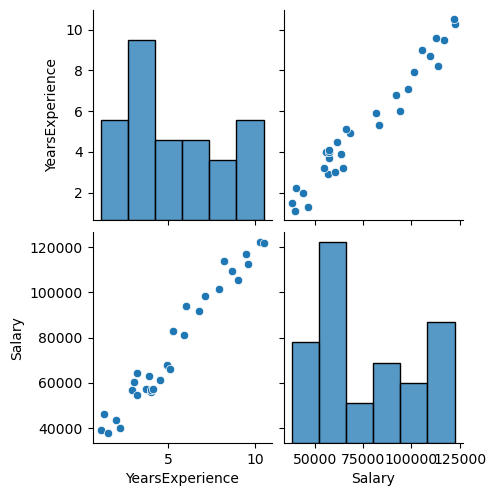

In [16]:
# Visualize Whole Data set
sns.pairplot(dataset)

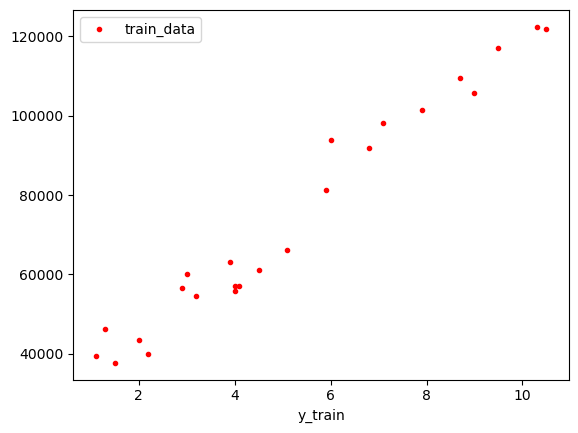

In [17]:
# Visualize Only Train data
plt.plot(X_train,y_train,'r.',label='train_data')
plt.xlabel('X_train')
plt.xlabel('y_train')
plt.legend()
plt.show()

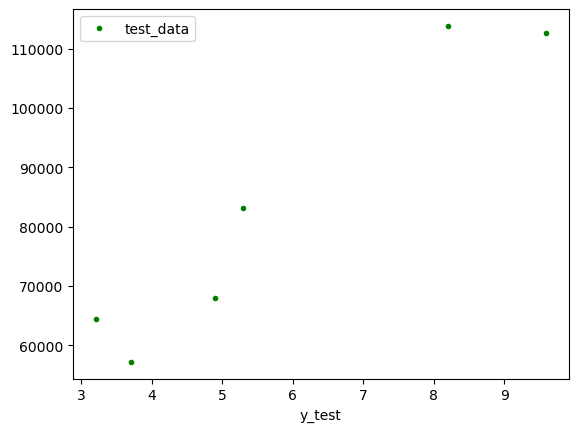

In [18]:
# Visualize Only Test data
plt.plot(X_test,y_test,'g.',label='test_data')
plt.xlabel('X_test')
plt.xlabel('y_test')
plt.legend()
plt.show()

In The Above three graph clealr shows that the data is linearly deparable so here we use Linear Regression

### Predicting the Test set results

In [19]:
y_pred = model.predict(X_test).round(1)

In [20]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Salary","Predict Salary"])
calculation

,Original Salary,Predict Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


In [21]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.9645401573418146
Testing Accuracy : 0.9024461774180497


## Visualising the Training set results

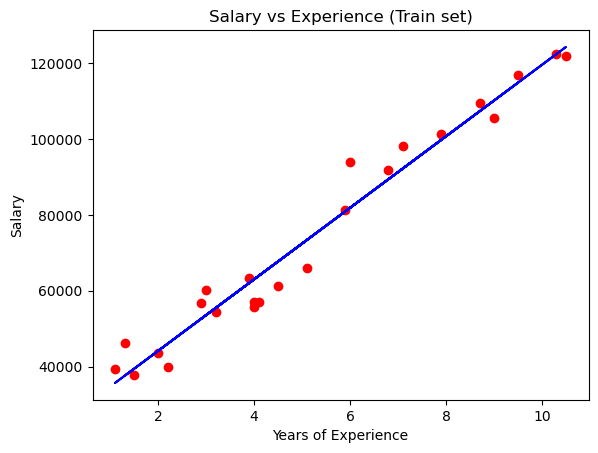

In [22]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Testing set results

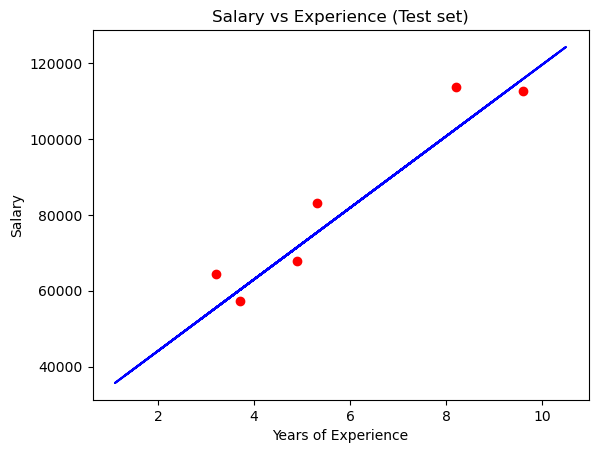

In [23]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()